In [2]:
import numpy as np

# generate a gaussian kernel matrix

def gaussian_kernel(size, sigma):
    """Generate a Gaussian kernel matrix."""
    ax = np.linspace(-(size // 2), size // 2, size)
    xx, yy = np.meshgrid(ax, ax)
    kernel = np.exp(-(xx**2 + yy**2) / (2. * sigma**2))
    return kernel / np.sum(kernel)

# Example usage
size = 13  # Kernel size
sigma = 3.0  # Standard deviation
kernel_matrix_3 = gaussian_kernel(size, 3)
kernel_matrix_6 = gaussian_kernel(size, 6)


Kernel Matrix 3 - Max: 0.018775252237269727, Min: 0.00034388074002273083
Kernel Matrix 6 - Max: 0.008483353247146929, Min: 0.003120851251820353


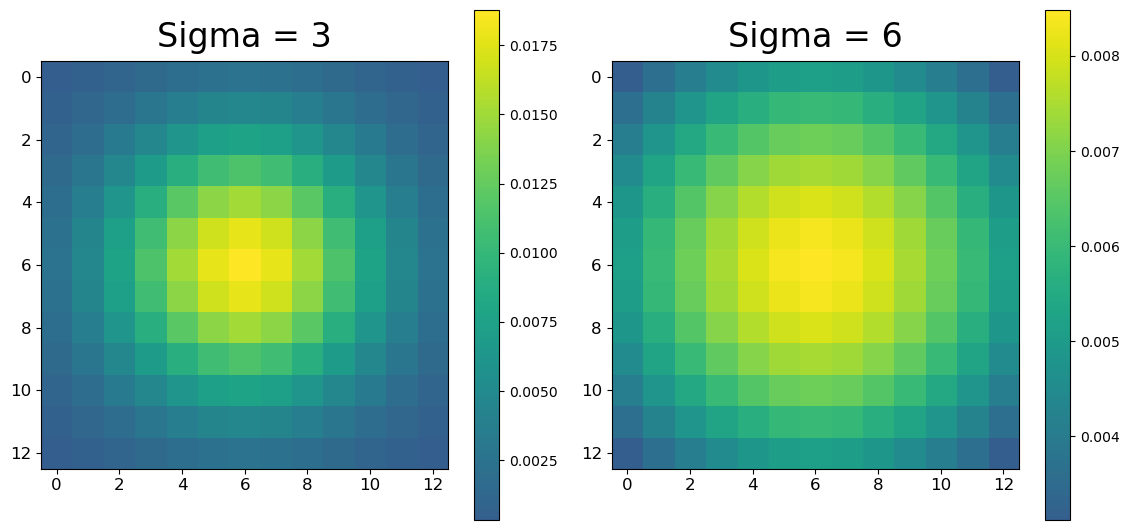

<Figure size 640x480 with 0 Axes>

In [4]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.colors import ListedColormap


# Add a title for the entire plot
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
#fig.suptitle('Gaussian Kernel Matrix', fontsize=28, y=1)

# Calculate max and min for each matrix
max_kernel_3 = np.max(kernel_matrix_3)
min_kernel_3 = np.min(kernel_matrix_3)

max_kernel_6 = np.max(kernel_matrix_6)
min_kernel_6 = np.min(kernel_matrix_6)

print(f"Kernel Matrix 3 - Max: {max_kernel_3}, Min: {min_kernel_3}")
print(f"Kernel Matrix 6 - Max: {max_kernel_6}, Min: {min_kernel_6}")

white_to_red = LinearSegmentedColormap.from_list("white_red", ["white", "red"])

full_cmap = plt.get_cmap('viridis')

# Sample just the upper half (e.g., white to red)
colors = full_cmap(np.linspace(0.3, 1.0, 256))
half_cmap = ListedColormap(colors)

# Plot kernel_matrix_3
axes[0].imshow(kernel_matrix_3, cmap=half_cmap, interpolation='nearest', vmin=min_kernel_3, vmax=max_kernel_3)
#axes[0].imshow(kernel_matrix_3, cmap='viridis', interpolation='nearest')
axes[0].tick_params(axis='both', labelsize=12)
axes[0].set_title('Sigma = 3', fontsize=24, pad=10)
#axes[0].set_xlabel('X-axis')
#axes[0].set_ylabel('Y-axis')
axes[0].colorbar = fig.colorbar(axes[0].images[0], ax=axes[0]) #, label='Intensity')

# Plot kernel_matrix_6
axes[1].imshow(kernel_matrix_6, cmap=half_cmap, interpolation='nearest')
axes[1].tick_params(axis='both', labelsize=12)
axes[1].set_title('Sigma = 6', fontsize=24, pad=10)
#axes[1].set_xlabel('X-axis')
#axes[1].set_ylabel('Y-axis')
axes[1].colorbar = fig.colorbar(axes[1].images[0], ax=axes[1])

plt.tight_layout()
plt.subplots_adjust(left=0.05, right=0.95, top=0.9, bottom=0.05)
plt.show()

plt.savefig('/tmp/gaussian_kernel_matrices.svg', format='svg', bbox_inches='tight')

Saving kernel difference plot...


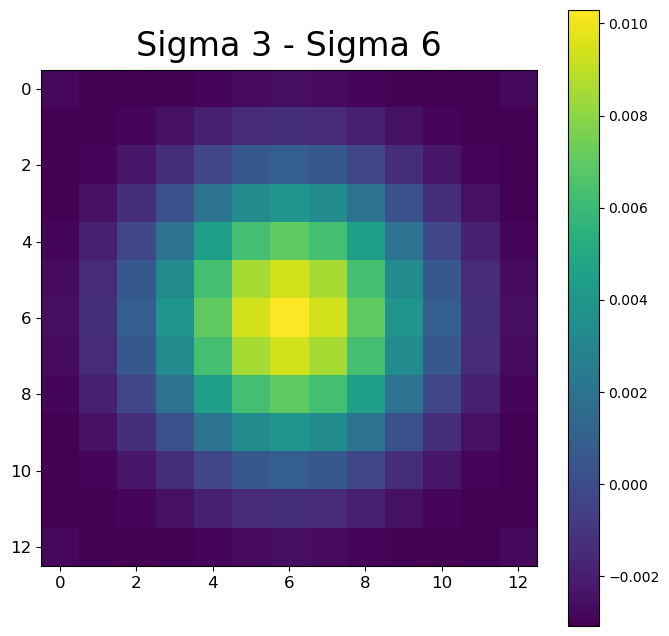

In [8]:
kernel_difference = kernel_matrix_3 - kernel_matrix_6

# Plot the difference
plt.figure(figsize=(8, 8))
plt.imshow(kernel_difference, cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.tick_params(axis='both', labelsize=12)
plt.title('Sigma 3 - Sigma 6', fontsize=24, pad=10)
#plt.xlabel('Column Index')
#plt.ylabel('Row Index')

print("Saving kernel difference plot...")

# Save as SVG
plt.savefig("/tmp/kernel_difference.svg", format='svg')

plt.show()


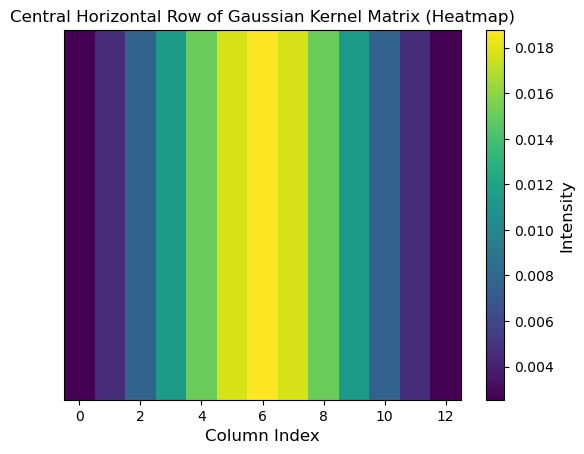

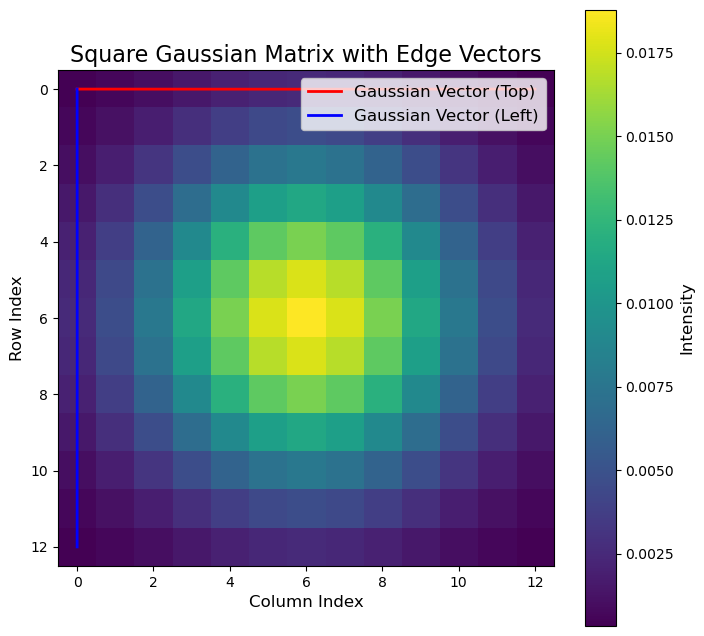

[[0.00034388 0.00063359 0.00104462 0.00154117 0.00203464 0.00240364
  0.00254095 0.00240364 0.00203464 0.00154117 0.00104462 0.00063359
  0.00034388]
 [0.00063359 0.00116738 0.00192468 0.00283956 0.00374877 0.00442865
  0.00468165 0.00442865 0.00374877 0.00283956 0.00192468 0.00116738
  0.00063359]
 [0.00104462 0.00192468 0.00317327 0.00468165 0.00618068 0.00730161
  0.00771874 0.00730161 0.00618068 0.00468165 0.00317327 0.00192468
  0.00104462]
 [0.00154117 0.00283956 0.00468165 0.00690703 0.00911861 0.01077237
  0.01138777 0.01077237 0.00911861 0.00690703 0.00468165 0.00283956
  0.00154117]
 [0.00203464 0.00374877 0.00618068 0.00911861 0.01203832 0.0142216
  0.01503405 0.0142216  0.01203832 0.00911861 0.00618068 0.00374877
  0.00203464]
 [0.00240364 0.00442865 0.00730161 0.01077237 0.0142216  0.01680083
  0.01776063 0.01680083 0.0142216  0.01077237 0.00730161 0.00442865
  0.00240364]
 [0.00254095 0.00468165 0.00771874 0.01138777 0.01503405 0.01776063
  0.01877525 0.01776063 0.0150340

In [ ]:
# Extract the central horizontal row
central_row = kernel_matrix[size // 2, :]

# Plot the central row as a heatmap
plt.imshow(central_row[np.newaxis, :], cmap='viridis', aspect='auto', interpolation='nearest')
plt.colorbar(label='Intensity')
plt.title('Central Horizontal Row of Gaussian Kernel Matrix (Heatmap)')
plt.xlabel('Column Index')
plt.yticks([])  # Remove y-axis ticks for better visualization
plt.show()


# Generate a 1D Gaussian vector
def gaussian_vector(size, sigma):
    """Generate a 1D Gaussian vector."""
    ax = np.linspace(-(size // 2), size // 2, size)
    vector = np.exp(-0.5 * (ax / sigma)**2)
    return vector / np.sum(vector)

# Generate the 1D Gaussian vector
gaussian_vec = gaussian_vector(size, sigma)

# Compute the square Gaussian matrix as the outer product
square_gaussian_matrix = np.outer(gaussian_vec, gaussian_vec)
# Plot the square Gaussian matrix with the two linear vectors on the edges
fig, ax = plt.subplots(figsize=(8, 8))

# Display the square Gaussian matrix
im = ax.imshow(square_gaussian_matrix, cmap='viridis', interpolation='nearest')

# Add the Gaussian vector to the top and left edges
ax.plot(range(size), gaussian_vec * np.max(square_gaussian_matrix), color='red', label='Gaussian Vector (Top)', lw=2)
ax.plot(gaussian_vec * np.max(square_gaussian_matrix), range(size), color='blue', label='Gaussian Vector (Left)', lw=2)

# Add a colorbar
cbar = plt.colorbar(im, ax=ax)
cbar.set_label('Intensity')

# Add labels and title
ax.set_title('Square Gaussian Matrix with Edge Vectors', fontsize=16)
ax.set_xlabel('Column Index')
ax.set_ylabel('Row Index')

# Add legend
ax.legend(loc='upper right')

plt.show()
print(square_gaussian_matrix)

In [ ]:
# Generate a 1D Gaussian vector
def gaussian_vector(size, sigma):
    """Generate a 1D Gaussian vector."""
    ax = np.linspace(-(size // 2), size // 2, size)
    vector = np.exp(-0.5 * (ax / sigma)**2)
    return vector / np.sum(vector)

# Generate the 1D Gaussian vector
gaussian_vec = gaussian_vector(size, sigma)

# Compute the square Gaussian matrix as the outer product
square_gaussian_matrix = np.outer(gaussian_vec, gaussian_vec)
# Plot the square Gaussian matrix with the two linear vectors on the edges
fig, ax = plt.subplots(figsize=(8, 8))

# Display the square Gaussian matrix
im = ax.imshow(square_gaussian_matrix, cmap='viridis', interpolation='nearest')

# Add the Gaussian vector to the top and left edges
ax.plot(range(size), gaussian_vec * np.max(square_gaussian_matrix), color='red', label='Gaussian Vector (Top)', lw=2)
ax.plot(gaussian_vec * np.max(square_gaussian_matrix), range(size), color='blue', label='Gaussian Vector (Left)', lw=2)

# Add a colorbar
cbar = plt.colorbar(im, ax=ax)
cbar.set_label('Intensity')

# Add labels and title
ax.set_title('Square Gaussian Matrix with Edge Vectors', fontsize=16)
ax.set_xlabel('Column Index')
ax.set_ylabel('Row Index')

# Add legend
ax.legend(loc='upper right')

plt.show()
print(square_gaussian_matrix)